<a href="https://colab.research.google.com/github/shinieaggarwal72/segmentation-project/blob/main/model_segmentation_modified_weights_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install patchify

In [2]:
from patchify import patchify

In [3]:
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!cp -r '/content/drive/My Drive/Semantic segmentation dataset' '/content/'

In [6]:
%cd '/content/drive/My Drive'

/content/drive/My Drive


In [7]:
#!ls

In [8]:
dataset_path = '/content/Semantic segmentation dataset/'
#dataset = "dubai_data"

In [9]:
import os
for path, subdirs, files in os.walk(dataset_path):
  #print(path)
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    #print(images)
    print(path)
    for i, image in enumerate(images):
      if image.endswith('jpg'): #images
        #print(image)
        a = True

/content/Semantic segmentation dataset/Tile 5/images
/content/Semantic segmentation dataset/Tile 2/images
/content/Semantic segmentation dataset/Tile 4/images
/content/Semantic segmentation dataset/Tile 3/images
/content/Semantic segmentation dataset/Tile 7/images
/content/Semantic segmentation dataset/Tile 6/images
/content/Semantic segmentation dataset/Tile 8/images
/content/Semantic segmentation dataset/Tile 1/images


In [10]:
import cv2 as cv
import numpy as np


array([[[201, 195, 190],
        [225, 219, 214],
        [241, 232, 228],
        ...,
        [255, 236, 231],
        [254, 234, 229],
        [255, 239, 234]],

       [[226, 220, 215],
        [254, 248, 243],
        [255, 255, 251],
        ...,
        [252, 231, 229],
        [247, 228, 223],
        [242, 223, 218]],

       [[248, 241, 238],
        [255, 252, 249],
        [255, 255, 251],
        ...,
        [253, 234, 231],
        [252, 235, 232],
        [245, 228, 225]],

       ...,

       [[211, 200, 203],
        [220, 209, 212],
        [221, 211, 217],
        ...,
        [220, 229, 242],
        [234, 243, 255],
        [235, 244, 255]],

       [[209, 198, 201],
        [219, 208, 211],
        [220, 210, 216],
        ...,
        [213, 222, 235],
        [222, 231, 244],
        [218, 227, 240]],

       [[213, 202, 205],
        [210, 199, 202],
        [201, 191, 197],
        ...,
        [223, 232, 245],
        [233, 242, 255],
        [230, 239, 252]]], dtype=uint8)
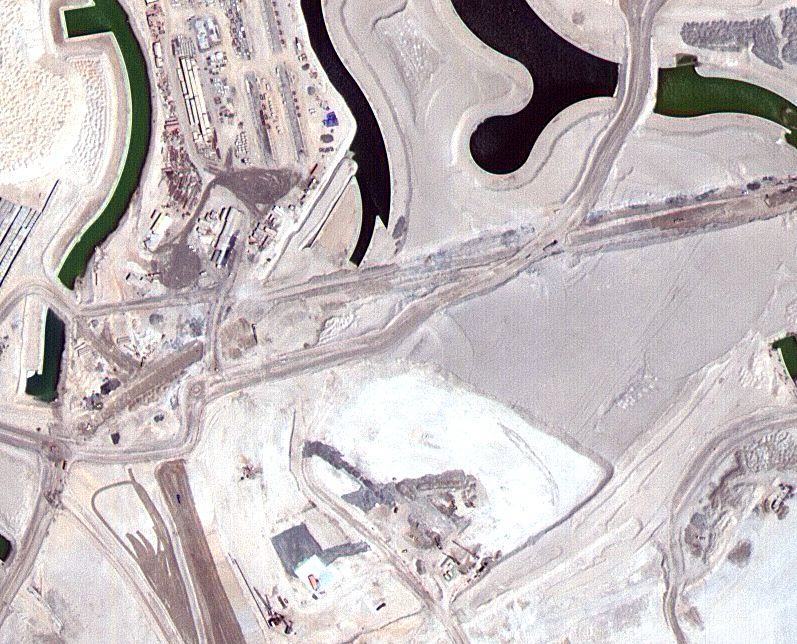

In [11]:
img = cv.imread('/content/Semantic segmentation dataset/Tile 1/images/image_part_001.jpg', 1)
img

In [12]:
type(img)

numpy.ndarray

In [13]:
from PIL import Image

In [14]:
print(type(Image.fromarray(img)))

<class 'PIL.Image.Image'>


In [15]:
patch_sz = 256
img.shape[0]

644

In [16]:
img.shape[1]
(img.shape[1]//patch_sz)*patch_sz

768

In [17]:
"""
x = (img.shape[1]//patch_sz)*patch_sz
y = (img.shape[0]//patch_sz)*patch_sz
"""

'\nx = (img.shape[1]//patch_sz)*patch_sz\ny = (img.shape[0]//patch_sz)*patch_sz\n'

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
images_ext = '.jpg'
mask_ext = '.png'
mask_data = []
img_data = []

for data_type in ['images', 'masks']:
  if data_type == 'images':
    ext = images_ext
  elif data_type == 'masks':
    ext = mask_ext
  for tile_no in range(1,100):
    for image_no in range(1,100):
      im = cv.imread(f'{dataset_path}/Tile {tile_no}/{data_type}/image_part_00{image_no}{ext}', 1)
      if im is not None:
        #plt.imshow(im[:,:, ::-1])
        #print(data_type)
        x = (im.shape[1]//patch_sz)*patch_sz
        y = (im.shape[0]//patch_sz)*patch_sz
        #print(x,",",y)
        if data_type == 'masks':
          im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        image = Image.fromarray(im)
        image = image.crop((0,0,x,y)) #(left,upper,right,lower)
        #print(image.size)
        #print(type(image))
        image = np.array(image)
        patched_imgs = patchify(image, (patch_sz, patch_sz, 3), step=patch_sz)
        #print(patched_imgs.shape)
        #print(len(patched_imgs))
        print(patched_imgs.shape[0])
        for i in range(patched_imgs.shape[0]):
          for j in range(patched_imgs.shape[1]):
            if data_type == 'images':
              patched_img = patched_imgs[i,j,:,:]

              patched_img = scaler.fit_transform(patched_img.reshape(-1, patched_img.shape[-1])).reshape(patched_img.shape)
              patched_img = patched_img[0]
              #plt.imshow(patched_img)
              #print(patched_img.shape)
              img_data.append(patched_img)
            elif data_type == 'masks':
              patched_mask = patched_imgs[i,j,:,:]
              patched_mask = patched_mask[0]
              mask_data.append(patched_mask)

#print(len(img_data))
#print(len(mask_data))



2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
8
8
8
8
8
8
8
8
8
5
5
5
5
5
5
5
5
5
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
8
8
8
8
8
8
8
8
8
5
5
5
5
5
5
5
5
5


In [21]:
import random

402


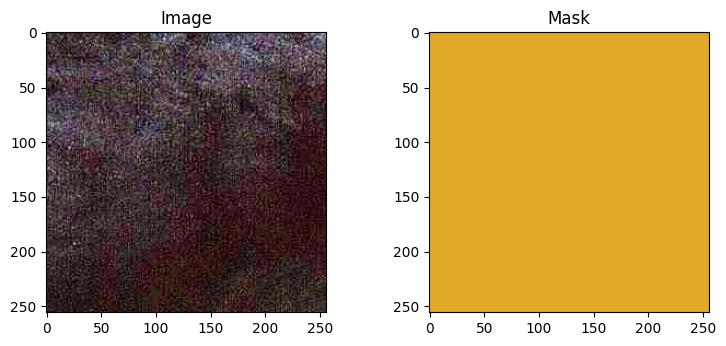

In [22]:
r = random.randint(0,len(img_data))
print(r)
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title('Image')
plt.imshow(img_data[r])
plt.subplot(232)
plt.title('Mask')
plt.imshow(mask_data[r])

In [23]:
print(len(img_data))

1305


In [24]:
print(len(mask_data))

1305


array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]], dtype=uint8)
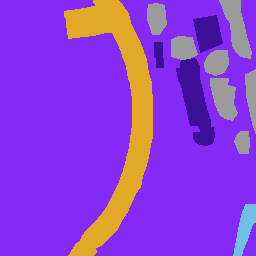

In [25]:
mask_data[0]

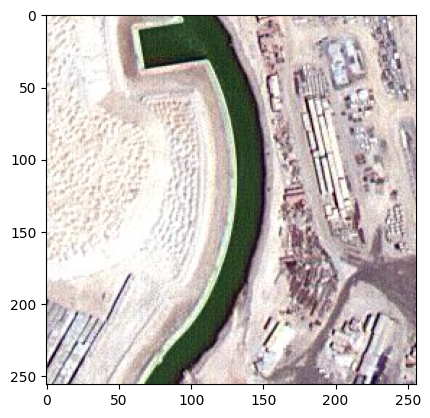

In [26]:
plt.imshow(img_data[0])

In [27]:
mask_data = np.array(mask_data)

In [28]:
img_data = np.array(img_data)

In [29]:
print(len(mask_data))
print(len(img_data))

1305
1305


In [30]:
img_data[0]

array([[[0.78823529, 0.76470588, 0.74509804],
        [0.88235294, 0.85882353, 0.83921569],
        [0.94509804, 0.90980392, 0.89411765],
        ...,
        [0.89411765, 0.85882353, 0.82352941],
        [0.85882353, 0.83137255, 0.79607843],
        [0.87843137, 0.85098039, 0.81568627]],

       [[0.88627451, 0.8627451 , 0.84313725],
        [0.99607843, 0.97254902, 0.95294118],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89803922, 0.8627451 ],
        [0.92941176, 0.90196078, 0.86666667],
        [0.95294118, 0.91764706, 0.88235294]],

       [[0.97254902, 0.94509804, 0.93333333],
        [1.        , 0.98823529, 0.97647059],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89411765, 0.86666667],
        [0.92156863, 0.89411765, 0.85882353],
        [0.90196078, 0.86666667, 0.83137255]],

       ...,

       [[0.88235294, 0.8627451 , 0.86666667],
        [0.81960784, 0.80392157, 0.8       ],
        [0.7372549 , 0

In [31]:
type(img_data[0])

numpy.ndarray

In [32]:
import random

In [33]:
def hex_to_rgb(hex_code):
  hex_code = hex_code.lstrip('#')
  return np.array(tuple(int(hex_code[i:i+2], 16) for i in (0, 2, 4)))

In [34]:
class_building = hex_to_rgb('#3C1098')
print(class_building)

class_land = hex_to_rgb('#8429F6')
print(class_land)

class_road = hex_to_rgb('#6EC1E4')
print(class_road)

class_vegetation = hex_to_rgb('#FEDD3A')
print(class_vegetation)

class_water = hex_to_rgb('#E2A929')
print(class_water)

class_unlabeled = hex_to_rgb('#9B9B9B')
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [35]:
mask_data.shape[0]

1305

In [36]:
label = patched_mask

In [37]:
def rgb_to_label(label):
  label_segm = np.zeros(label.shape, dtype=np.uint8)
  label_segm[np.all(label == class_water, axis=-1)] = 0
  label_segm[np.all(label == class_vegetation, axis=-1)] = 4
  label_segm[np.all(label == class_land, axis=-1)] = 1
  label_segm[np.all(label == class_road, axis=-1)] = 2
  label_segm[np.all(label == class_building, axis=-1)] = 3
  label_segm[np.all(label == class_unlabeled, axis=-1)] = 5
  label_segm = label_segm[:,:,0]
  print(label_segm.shape)
  return label_segm

In [38]:
labels = []
for i in range(mask_data.shape[0]):
  label = rgb_to_label(mask_data[i])
  labels.append(label)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

array([[3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=uint8)
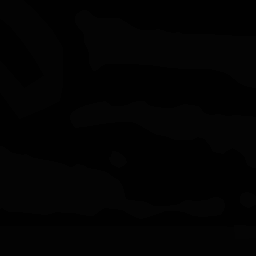

In [39]:
n=random.randint(0,len(labels))
labels[n]

In [40]:
print(np.unique(labels))

[0 1 2 3 4 5]


In [41]:
"""
id = random.randint(0,len(img_data))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(img_data[id])
plt.subplot(122)
plt.imshow(labels[id[:,:,0]])
"""

'\nid = random.randint(0,len(img_data))\nplt.figure(figsize=(14,8))\nplt.subplot(121)\nplt.imshow(img_data[id])\nplt.subplot(122)\nplt.imshow(labels[id[:,:,0]])\n'

In [42]:
"""
masks_ext = '.png'
#/content/Semantic segmentation dataset/Tile 1/masks/image_part_001.png
mask_data = []
for tile_no in range(1,100):
  for mask_no in range(1,100):
    mask = cv.imread(f'{dataset_path}/Tile {tile_no}/masks/image_part_00{mask_no}{masks_ext}',cv.IMREAD_COLOR)
    if mask is not None:
      x = (mask.shape[1]//patch_sz)*patch_sz
      y = (mask.shape[0]//patch_sz)*patch_sz
"""


"\nmasks_ext = '.png'\n#/content/Semantic segmentation dataset/Tile 1/masks/image_part_001.png\nmask_data = []\nfor tile_no in range(1,100):\n  for mask_no in range(1,100):\n    mask = cv.imread(f'{dataset_path}/Tile {tile_no}/masks/image_part_00{mask_no}{masks_ext}',cv.IMREAD_COLOR)\n    if mask is not None:\n      x = (mask.shape[1]//patch_sz)*patch_sz\n      y = (mask.shape[0]//patch_sz)*patch_sz\n"

In [43]:
patch = patchify(img, (patch_sz, patch_sz, 3), step=patch_sz)
len(patch)

2

In [44]:
type(img)

numpy.ndarray

In [45]:
num_of_classes = len(np.unique(labels))
print(num_of_classes)

6


In [46]:
from tensorflow.keras.utils import to_categorical


In [47]:
cat_data = to_categorical(labels, num_classes=num_of_classes)

In [48]:
cat_data.shape  # 6 meand number of classes

(1305, 256, 256, 6)

In [49]:
training_data = img_data

In [50]:
training_data.shape

(1305, 256, 256, 3)

In [51]:
from sklearn.model_selection import train_test_split


In [52]:
X_train, X_test, y_train, y_test = train_test_split(training_data, cat_data, test_size=0.15, random_state=100)

In [53]:
img_height = X_train.shape[1]
img_width = X_train.shape[2]
img_channels = X_train.shape[3]
print(img_height)
print(img_width)
print(img_channels)

256
256
3


In [54]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

In [55]:
from keras import backend as k

In [56]:
def jaccard_index(y_true, y_pred):
  y_true_flatten = k.flatten(y_true)
  y_pred_flatten = k.flatten(y_pred)
  intersection = k.sum(y_true_flatten*y_pred_flatten)
  union = k.sum(y_true_flatten) + k.sum(y_pred)
  final_val = intersection/(union-intersection+1.0)
  return final_val


In [57]:
def unet_model(num_of_classes=5, img_height=256, img_width=256, img_channels=3):
  input = Input((img_height, img_width, img_channels))
  c1 = Conv2D(filters=16,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(filters=16,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)
  p1 = MaxPooling2D(pool_size=(2,2))(c1)

  c2 = Conv2D(filters=32,kernel_size = (3,3), activation = 'relu', kernel_initializer='he_normal', padding='same')(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(filters=32,kernel_size = (3,3), activation = 'relu', kernel_initializer='he_normal', padding='same')(c2)
  p2 = MaxPooling2D(pool_size=(2,2))(c2)

  c3 = Conv2D(filters=64,kernel_size = (3,3), activation = 'relu', kernel_initializer='he_normal', padding='same')(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(filters=64,kernel_size = (3,3), activation = 'relu', kernel_initializer='he_normal', padding='same')(c3)
  p3 = MaxPooling2D(pool_size=(2,2))(c3)

  c4 = Conv2D(filters=128,kernel_size = (3,3), activation = 'relu', kernel_initializer='he_normal', padding='same')(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(filters=128,kernel_size = (3,3), activation = 'relu', kernel_initializer='he_normal', padding='same')(c4)
  p4 = MaxPooling2D(pool_size=(2,2))(c4)

  c5 = Conv2D(filters=256,kernel_size = (3,3), activation = 'relu', kernel_initializer='he_normal', padding='same')(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(filters=256,kernel_size = (3,3), activation = 'relu', kernel_initializer='he_normal', padding='same')(c5)

  u6 = Conv2DTranspose(filters=128, kernel_size=(2,2), strides=(2,2),padding='same')(c5)
  u6 = concatenate([u6,c4])
  c6 = Conv2D(filters=128, kernel_size=(3,3), activation='relu',kernel_initializer='he_normal', padding='same')(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
  u7 = Conv2DTranspose(filters=64, kernel_size=(2,2), strides=(2,2), padding='same')(u6)
  u7 = concatenate([u7,c3])
  c7 = Conv2D(filters=64,kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(filters=64,kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
  u8 = Conv2DTranspose(filters = 32, kernel_size=(2,2), strides = (2,2), padding = 'same')(u7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

  u9 = Conv2DTranspose(filters=16, kernel_size=(2,2), strides=(2,2), padding='same')(u8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(filters=16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(filters=16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

  output = Conv2D(num_of_classes, (1,1), activation = 'softmax')(c9)
  model = Model(inputs = [input], outputs = [output])
  return model








In [58]:
metrics = ["accuracy", jaccard_index]

In [59]:
def get_model():
  return unet_model(num_of_classes=num_of_classes, img_height=img_height, img_width=img_width, img_channels=img_channels)

In [60]:
model = get_model()

In [61]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

In [62]:
#building-3
#vegetation-4
#1-land
#weights = [0.167, 0.182, 0.167, 0.13, 0.185, 0.167]
weights = [0.166, 0.2, 0.166, 0.12, 0.182, 0.166]

In [63]:
#!pip install -U segmentation_models

In [64]:
#import segmentation_models as sm

In [65]:
#!pip install -q keras==2.5

In [66]:

!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
#import segmentation_models as sm


ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.17.0rc0)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.

In [67]:
!pip install -U segmentation-models

In [68]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [69]:
ce_loss = sm.losses.CategoricalCELoss(class_weights = weights)

In [70]:
dice_loss=sm.losses.DiceLoss(class_weights= weights)

In [71]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [72]:
total_loss = dice_loss + 1*focal_loss

In [73]:
#tf.keras.backend.clear_session()

In [74]:
import tensorflow as tf

In [75]:
tf.keras.backend.clear_session()

In [76]:
model.compile(optimizer = 'adam', loss=ce_loss, metrics=metrics)

In [77]:
#model.compile(optimizer = 'adam', loss=total_loss, metrics=metrics)

In [78]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [79]:
import logging

In [80]:
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [81]:

EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
#Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.0001)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',patience=4,verbose=1,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('model.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)
#callback=[EarlyStop , Reduce_LR,model_check]
callback = [EarlyStop, Reduce_LR]


In [82]:
#model_train =model.fit(X_train, y_train, batch_size=16, verbose=1, epochs=50, callbacks = callback, validation_data=(X_test, y_test), shuffle=False )

In [83]:
import sys

In [84]:
"""
try:
  mode_train = model.fit(X_train, y_train, batch_size=16, verbose=1, epochs=50, validation_data=(X_test, y_test), shuffle=False )
except KeyboardInterrupt:
  model.save('model.h5')
  logging.info('Saved interrupt')
  try:
    sys.exit(0)
  except SystemExit:
    os._exit(0)
"""

"\ntry:\n  mode_train = model.fit(X_train, y_train, batch_size=16, verbose=1, epochs=50, validation_data=(X_test, y_test), shuffle=False )\nexcept KeyboardInterrupt:\n  model.save('model.h5')\n  logging.info('Saved interrupt')\n  try:\n    sys.exit(0)\n  except SystemExit:\n    os._exit(0)\n"

In [85]:

try:
  model_train =model.fit(
                        X_train,
                        y_train,
                        batch_size=16,
                        verbose=1,
                        epochs=100,
                        validation_data=(X_test, y_test),
                        shuffle=False,
                        callbacks = callback
                      )
except KeyboardInterrupt:
  model.save('model.h5')
  logging.info('saved interrupt')
  """
  try:
    sys.exit(0)
  except SystemExit:
    os._exit(0)
  """

Epoch 1/100
70/70 [==============================] - 90s 1s/step - loss: 0.0311 - accuracy: 0.5658 - jaccard_index: 0.3230 - val_loss: 0.0278 - val_accuracy: 0.6275 - val_jaccard_index: 0.4234 - lr: 0.0010
Epoch 2/100
70/70 [==============================] - 84s 1s/step - loss: 0.0248 - accuracy: 0.6648 - jaccard_index: 0.4137 - val_loss: 0.0257 - val_accuracy: 0.6470 - val_jaccard_index: 0.4458 - lr: 0.0010
Epoch 3/100
70/70 [==============================] - 83s 1s/step - loss: 0.0226 - accuracy: 0.6964 - jaccard_index: 0.4451 - val_loss: 0.0235 - val_accuracy: 0.6900 - val_jaccard_index: 0.4582 - lr: 0.0010
Epoch 4/100
70/70 [==============================] - 85s 1s/step - loss: 0.0203 - accuracy: 0.7478 - jaccard_index: 0.4893 - val_loss: 0.0208 - val_accuracy: 0.7531 - val_jaccard_index: 0.4930 - lr: 0.0010
Epoch 5/100
70/70 [==============================] - 83s 1s/step - loss: 0.0193 - accuracy: 0.7647 - jaccard_index: 0.5084 - val_loss: 0.0205 - val_accuracy: 0.7482 - val_jacca

In [86]:
"""
model_train = model.fit(
                        X_train,
                        y_train,
                        batch_size = 16,
                        verbose = 1,
                        epochs = 100,
                        validation_data = (X_test, y_test),
                        shuffle = False,
                        initial_epoch=50
                      )
"""

'\nmodel_train = model.fit(\n                        X_train,\n                        y_train,\n                        batch_size = 16,\n                        verbose = 1,\n                        epochs = 100,\n                        validation_data = (X_test, y_test),\n                        shuffle = False,\n                        initial_epoch=50\n                      )\n'

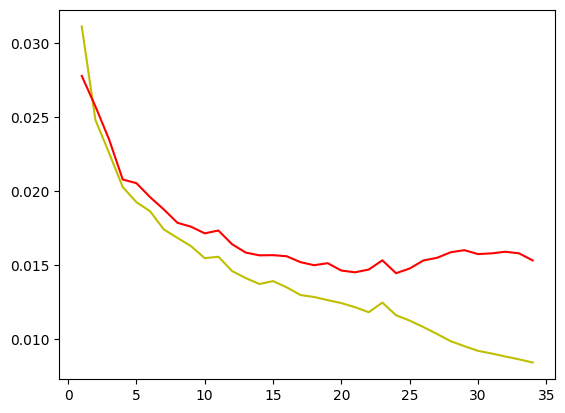

In [87]:
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.show()

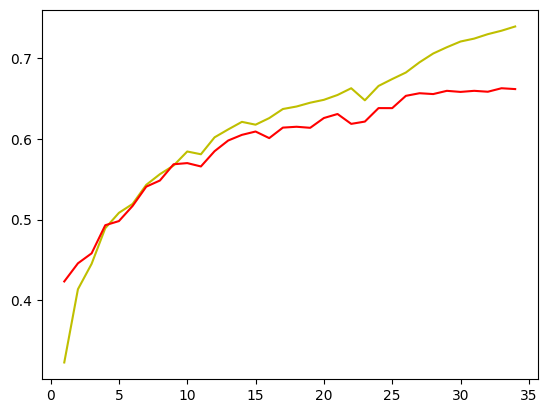

In [88]:
jaccard_idx = model_train.history['jaccard_index']
val_jaccard_idx = model_train.history['val_jaccard_index']
epochs = range(1, len(loss)+1)
plt.plot(epochs, jaccard_idx, 'y', label='Training jaccard_index')
plt.plot(epochs, val_jaccard_idx, 'r', label='Validation jaccard_index')
plt.show()


In [89]:
model_train.params

{'verbose': 1, 'epochs': 100, 'steps': 70}

In [90]:
y_pred = model.predict(X_test)

7/7 [==============================] - 3s 321ms/step


In [91]:
y_pred

array([[[[5.09278886e-02, 6.20812356e-01, 1.59340054e-01,
          6.70995936e-02, 5.46046384e-02, 4.72153910e-02],
         [3.88662741e-02, 7.12539434e-01, 1.28618464e-01,
          4.63944301e-02, 4.03128415e-02, 3.32685634e-02],
         [3.32622677e-02, 7.54993200e-01, 1.13006182e-01,
          3.84643525e-02, 2.66237482e-02, 3.36502381e-02],
         ...,
         [1.85871981e-02, 9.22177792e-01, 4.26241122e-02,
          3.13687860e-03, 1.14259059e-02, 2.04806286e-03],
         [2.08651293e-02, 8.99830222e-01, 5.47940768e-02,
          6.27100514e-03, 1.43049620e-02, 3.93457012e-03],
         [4.77580205e-02, 7.94018388e-01, 7.17035905e-02,
          2.74403635e-02, 4.88481484e-02, 1.02312407e-02]],

        [[1.55981593e-02, 7.91767597e-01, 1.16130307e-01,
          3.68494168e-02, 1.81310605e-02, 2.15233862e-02],
         [7.64755625e-03, 8.61195266e-01, 7.96833187e-02,
          2.39134673e-02, 6.93784514e-03, 2.06226576e-02],
         [6.93418505e-03, 8.84168923e-01, 6.8581

In [92]:
len(y_pred)

196

In [93]:
argmax_y_pred = np.argmax(y_pred, axis=3)

In [94]:
argmax_y_pred

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 3, 3, 1],
        [1, 1, 1, ..., 3, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 3, 1, 1],
        [1, 1, 1, ..., 3, 3, 1],
        [1, 1, 1, ..., 3, 3, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 2, 2, 1],
        [1, 1, 1, ..., 2, 2, 1],
        [1, 1, 1, ..., 2, 2, 2],
        ...,
        [1, 1, 1, ..., 

In [95]:
len(argmax_y_pred)

196

In [96]:
argmax_y_test = np.argmax(y_test, axis=3)

In [97]:
argmax_y_test

array([[[1, 1, 3, ..., 1, 1, 1],
        [1, 1, 3, ..., 1, 1, 1],
        [1, 1, 3, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1]],

       [[1, 2, 2, ..., 1, 1, 1],
        [1, 2, 2, ..., 1, 1, 2],
        [1, 2, 2, ..., 1, 2, 2],
        ...,
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        ...,
        [2, 2, 2, ..., 

In [98]:
y_test

array([[[[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0.

In [99]:
#m.result()

In [100]:
import random

In [105]:
argmax_y_test

array([[[1, 1, 3, ..., 1, 1, 1],
        [1, 1, 3, ..., 1, 1, 1],
        [1, 1, 3, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1]],

       [[1, 2, 2, ..., 1, 1, 1],
        [1, 2, 2, ..., 1, 1, 2],
        [1, 2, 2, ..., 1, 2, 2],
        ...,
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        ...,
        [2, 2, 2, ..., 

In [106]:
y_test

array([[[[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0.

In [107]:
y_pred

array([[[[5.09278886e-02, 6.20812356e-01, 1.59340054e-01,
          6.70995936e-02, 5.46046384e-02, 4.72153910e-02],
         [3.88662741e-02, 7.12539434e-01, 1.28618464e-01,
          4.63944301e-02, 4.03128415e-02, 3.32685634e-02],
         [3.32622677e-02, 7.54993200e-01, 1.13006182e-01,
          3.84643525e-02, 2.66237482e-02, 3.36502381e-02],
         ...,
         [1.85871981e-02, 9.22177792e-01, 4.26241122e-02,
          3.13687860e-03, 1.14259059e-02, 2.04806286e-03],
         [2.08651293e-02, 8.99830222e-01, 5.47940768e-02,
          6.27100514e-03, 1.43049620e-02, 3.93457012e-03],
         [4.77580205e-02, 7.94018388e-01, 7.17035905e-02,
          2.74403635e-02, 4.88481484e-02, 1.02312407e-02]],

        [[1.55981593e-02, 7.91767597e-01, 1.16130307e-01,
          3.68494168e-02, 1.81310605e-02, 2.15233862e-02],
         [7.64755625e-03, 8.61195266e-01, 7.96833187e-02,
          2.39134673e-02, 6.93784514e-03, 2.06226576e-02],
         [6.93418505e-03, 8.84168923e-01, 6.8581

In [108]:
argmax_y_pred

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 3, 3, 1],
        [1, 1, 1, ..., 3, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 3, 1, 1],
        [1, 1, 1, ..., 3, 3, 1],
        [1, 1, 1, ..., 3, 3, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 2, 2, 1],
        [1, 1, 1, ..., 2, 2, 1],
        [1, 1, 1, ..., 2, 2, 2],
        ...,
        [1, 1, 1, ..., 

In [110]:
"""
m = keras.metrics.OneHotMeanIoU(num_classes=6)
m.update_state(y_true=argmax_y_test, y_pred=prediction, sample_weight=weights)
m.result()
"""

'\nm = keras.metrics.OneHotMeanIoU(num_classes=6)\nm.update_state(y_true=argmax_y_test, y_pred=prediction, sample_weight=weights)\nm.result()\n'

In [133]:
r = random.randint(0,len(X_test))
print(r)
test_image = X_test[r]
ground_truth_image = argmax_y_test[r]
#predicted_image = argmax_y_pred[0]
test_image_input = np.expand_dims(test_image, 0)
prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis = 3)
predicted_image = predicted_image[0,:,:]

69
1/1 [==============================] - 0s 47ms/step


69


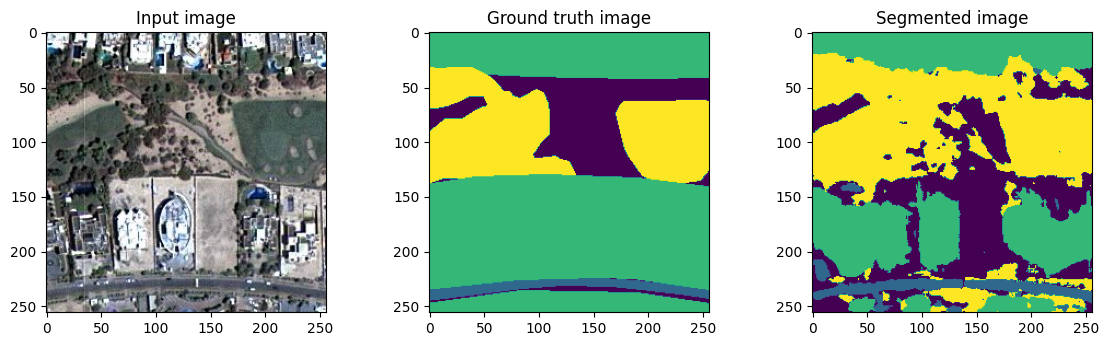

In [134]:
print(r)
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title('Input image')
plt.imshow(test_image)
plt.subplot(232)
plt.title('Ground truth image')
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title('Segmented image')
plt.imshow(predicted_image)


In [113]:
#model.save('unet_semantic_segmentation.keras')


In [114]:
segmented_img = model.predict('/content/i1.png')
plt.imshow(segmented_img)

IndexError: tuple index out of range

In [ ]:
model.save('/content/saved_model_.h5')

In [ ]:
from keras.models import load_model

In [ ]:
loaded_model = load_model('/content/saved_model_.h5', custom_objects=({'loss':total_loss}))

In [ ]:
model

In [ ]:
model.loss.name

In [ ]:
loaded_model = load_model('/content/saved_model_.h5', custom_objects=({'dice_loss_plus_1focal_loss':total_loss}))

In [ ]:
loaded_model = load_model('/content/saved_model_.h5', custom_objects=({'dice_loss_plus_1focal_loss':total_loss, 'jaccard_index':jaccard_index}))

In [ ]:
prediction = loaded_model.predict(X_test)
#plt.imshow(prediction)

In [ ]:
prediction = np.argmax(prediction, axis=3)

In [ ]:
from keras.models import load_model
loaded_model = load_model('/content/saved_model_.h5')

In [ ]:
from keras.models import load_model
loaded_model = load_model('/content/saved_model_.h5')

In [ ]:
loaded_model = keras.models.load_model('/content/saved_model_.h5')

In [ ]:
model2 = keras.saving.load_model('/content/saved_model_.h5', custom_objects=None, compile=True, safe_mode=True)

In [ ]:
from keras.models import load_model
loaded_model = load_model('/content/saved_model_.h5')
